This notebook is used for generating different benchmark

In [1]:
from utils import convert_bytes
from payload import generate_spectrum_pb, generate_spectrum_utf
from plots import plot_payload_size, plot_deserialisation_time
from producer import produce

#### Payload

In [2]:
# test
payload, size = generate_spectrum_utf(10)
print(payload, size)

b'{"timestamp": "2022-02-13 21:13:29", "x_min": 0, "x_max": 10, "y_min": 0, "y_max": 10, "channels": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], "power": [6.6000000000000005, 8.100000000000001, 4.8, 1.1, 4.2, 7.1, 8.100000000000001, 5.699999999999999, 6.2, 7.3], "sd_l": [0.11, 0.46, 0.84, 0.59, 0.28, 0.05, 0.04, 0.3, 0.28, 0.76], "sd_u": [0.69, 0.21, 0.59, 0.47, 0.73, 0.45, 0.01, 0.42, 0.71, 0.36]}' 420


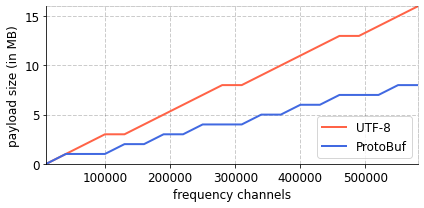

In [4]:
channels = []
utf_size = []
pb_size = []
unit = "MB"

pb_payloads = []
utf_payloads = []

# 10000, 600000, 30000
for channel in range(10000, 600000, 30000):
    channels.append(channel)

    payload, size = generate_spectrum_utf(channel)
    utf_size.append(convert_bytes(size, unit))
    utf_payloads.append(payload)

    payload, size = generate_spectrum_pb(channel)
    pb_size.append(convert_bytes(size, unit))
    pb_payloads.append(payload)

plot_payload_size(channels, utf_size, pb_size, unit)


In [ ]:

# test
print(len(channels))
print(len(utf_payloads))
#print(channels[19])

1
1


#### Browser Performance

In [17]:
from time import sleep

for d in pb_payloads:
    await produce(d, "spectrum-pb")
    sleep(3)

Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ea6d94f0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=43, timestamp=1644764996695, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8eac728b0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=44, timestamp=1644764999922, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-126' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8eaab7e80>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-137' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8eaab7640>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-147' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8eaac5c10>()]>

In [64]:
from time import sleep

for d in utf_payloads:
    await produce(d, "spectrum-utf")
    sleep(0.25)

Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7468baf0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=145, timestamp=1644701772272, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7468baf0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=146, timestamp=1644701772624, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda746fed60>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=147, timestamp=1644701773247, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda746e2ee0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=148, timestamp=1644701774148, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-6022' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda75743820>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-6032' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7495bdc0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-6042' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda746e2070>()]>

produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=149, timestamp=1644701775334, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77c3cbe0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=150, timestamp=1644701777045, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77c3cbe0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=151, timestamp=1644701778794, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-6072' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda746ce910>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-6082' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7495b4c0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda74c87430>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=152, timestamp=1644701780907, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7748deb0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=153, timestamp=1644701783258, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77ff31c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=154, timestamp=1644701785885, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-6112' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7468bfd0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda746e2b20>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=155, timestamp=1644701788783, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda74bc89d0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=156, timestamp=1644701791947, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77ff31c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=157, timestamp=1644701795405, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda80b2a760>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=158, timestamp=1644701799117, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77ff31c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=159, timestamp=1644701803103, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7561c1c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=160, timestamp=1644701807382, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda80b2a760>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=161, timestamp=1644701811936, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7561c1c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=162, timestamp=1644701816757, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7561c1c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=163, timestamp=1644701821869, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda74433be0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=164, timestamp=1644701827278, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-6062' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda746ceb50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-6092' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda804ae6a0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-6102' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda762e3ee0>()]>

#### Deserialisation Cost

In [63]:
for channel in range(len(channels)):
    for d in range(10):
        await produce(pb_payloads[d], "spectrum-pb")
        sleep(.25)
    
    sleep(10)

Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda75d788b0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=627, timestamp=1644701751179, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-5941' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda747f4940>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda747f47f0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=628, timestamp=1644701751458, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda747f47f0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=629, timestamp=1644701751802, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77cb2220>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=630, timestamp=1644701752195, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda747f47f0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=631, timestamp=1644701752661, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-5961' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7c943b80>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-5971' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda81057850>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-5981' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7495bd60>()]>

produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=632, timestamp=1644701753193, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77cb2220>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=633, timestamp=1644701753781, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-6001' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7495bdc0>()]> cb=[Sender._fail_all()]>


CancelledError: 

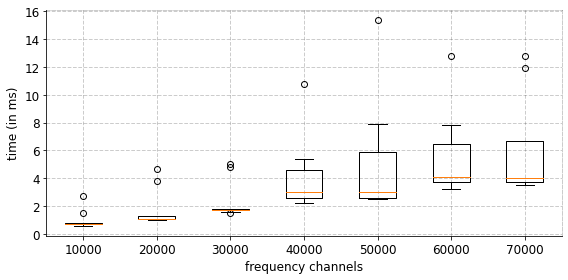

In [23]:

y = [
    [2.699999999254942, 1.5, 0.7000000011175871, 0.8000000007450581, 0.6000000014901161, 0.7999999988824129, 0.6999999992549419, 0.6999999992549419, 0.6999999992549419],
    [3.800000000745058, 4.699999999254942, 1.200000001117587, 1.299999998882413, 1.099999999627471, 1.099999999627471, 1.099999999627471, 1.099999999627471, 1],
    [4.800000000745058, 5, 1.700000001117587, 1.800000000745058, 1.6000000014901161, 1.700000001117587, 1.5, 1.699999999254942, 1.699999999254942],
    [10.800000000745058, 3, 5.400000000372529, 2.599999999627471, 3.300000000745058, 2.599999999627471, 4.600000001490116, 2.200000001117587, 2.900000000372529],
    [15.400000000372529, 7.900000000372529, 5.900000000372529, 2.5, 3.5, 2.599999999627471, 2.599999999627471, 2.899999998509884, 3],
    [12.799999998882413, 7.800000000745058, 6.5, 4.099999999627471, 3.199999999254942, 3.699999999254942, 3.5, 3.700000001117587, 4.400000000372529],
    [12.800000000745058, 11.900000000372529, 6.699999999254942, 3.699999999254942, 4, 3.599999999627471, 4.300000000745058, 3.5, 3.900000000372529]
]

channels = [10000, 20000, 30000, 40000, 50000, 60000, 70000]

plot_deserialisation_time(y, channels)